# Chaotic Systems

- **Created by Andrés Segura Tinoco**
- **Created on May 19, 2019**

Chaos theory is a branch of mathematics focusing on the behavior of dynamical systems that are highly sensitive to initial conditions. "Chaos" is an interdisciplinary theory stating that within the apparent randomness of chaotic complex systems, there are underlying patterns, constant feedback loops, repetition, self-similarity, fractals, self-organization, and reliance on programming at the initial point known as sensitive dependence on initial conditions. <a href="#link_one">[1]</a>

In [1]:
# Load the Python libraries
import numpy as np
from numpy import complex, array

In [2]:
# Load plotting libraries
import matplotlib.pyplot as plt
from PIL import Image
import colorsys

In [3]:
# This function gets a random number from a uniform distribution between the two input values [min_value, max_value] inclusively
def get_random_number(min_value, max_value):
    range = max_value - min_value
    num = np.random.uniform(0, 1)
    return min_value + range * num;

In [4]:
# Function that creates a series of numbers using chaos theory
def get_chaos_list(seed, n):
    numList = []
    lamda = 3.9976543219876543210
    x = seed;
    
    for i in range(n):
        x = x * lamda * (1 - x);
        numList += [x]
    
    return np.arange(len(numList)), numList;

\begin{align}
    l = 3.9976543219876543210 \\
    chaos(x) = x_{i+1} = x_i . l . (1 - x_i) \tag{1}
\end{align}

In [5]:
# Function that plot a (x, y) series of points
def plot_line_chart(x, y, x_label, y_label, title):
    plt.figure(figsize = (16, 4))
    plt.plot(x, y, label = y_label)
    plt.xlabel(x_label, fontsize = 11)
    plt.ylabel(y_label, fontsize = 11)
    plt.title(title)
    plt.legend(loc = 'upper right')
    plt.show()

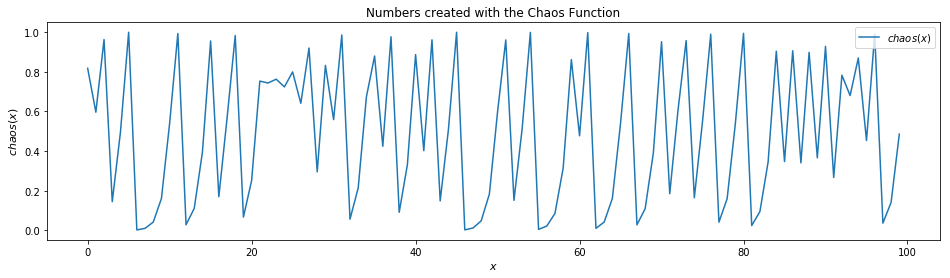

In [6]:
# Create and plot 100 random-chaos numbers
seed = get_random_number(0, 1)
x, y = get_chaos_list(seed, 100)
plot_line_chart(x, y, '$x$', '$chaos(x)$', 'Numbers created with the Chaos Function')

In [7]:
# Create 3 different seeds
gap = 1.00000001
seeds = []
seeds.append(get_random_number(0, 1))
seeds.append(seeds[len(seeds) - 1] * gap)
seeds.append(seeds[len(seeds) - 1] * gap)
seeds

[0.34549780601602587, 0.3454978094710039, 0.345497812925982]

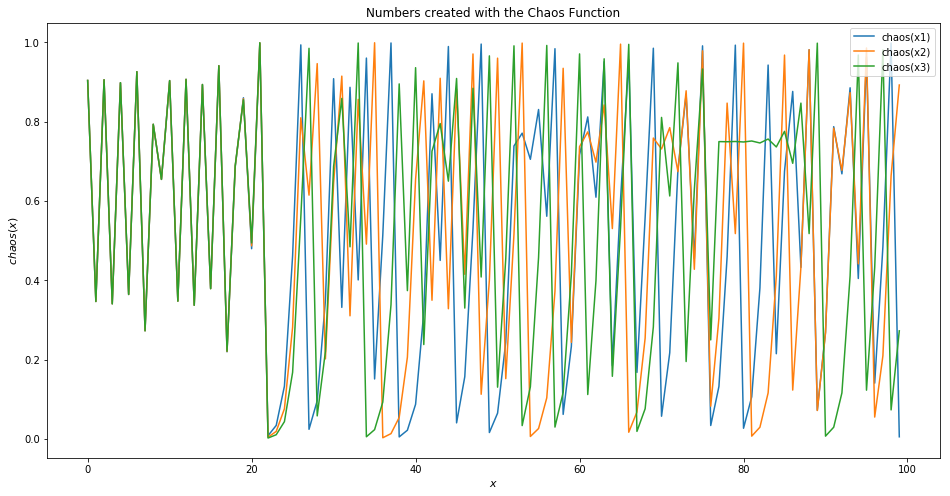

In [8]:
# Get 3 different chaos results
max_iter = 100
x1, y1 = get_chaos_list(seeds[0], max_iter)
x2, y2 = get_chaos_list(seeds[1], max_iter)
x3, y3 = get_chaos_list(seeds[2], max_iter)

# Plot multi-lines chart
x_label = '$x$'
y_label = '$chaos(x)$'
title = 'Numbers created with the Chaos Function'
plt.figure(figsize = (16, 8))
plt.plot(x1, y1, label = 'chaos(x1)')
plt.plot(x2, y2, label = 'chaos(x2)')
plt.plot(x3, y3, label = 'chaos(x3)')
plt.xlabel(x_label, fontsize = 11)
plt.ylabel(y_label, fontsize = 11)
plt.title(title)
plt.legend(loc = 'upper right')
plt.show()

## Fractals

In mathematics, a fractal is a subset of a Euclidean space for which the Hausdorff dimension strictly exceeds the topological dimension. Fractals tend to appear nearly the same at different levels, as is illustrated here in the successively small magnifications of the Mandelbrot set; because of this, fractals are encountered ubiquitously in nature

Fractals exhibit similar patterns at increasingly small scales called self similarity, also known as expanding symmetry or unfolding symmetry; if this replication is exactly the same at every scale, as in the Menger sponge, it is called affine self-similar. Fractal geometry lies within the mathematical branch of topology. <a href="#link_two">[2]</a>

Properties:
- Self-similarity
- Independence of scale
- Fractional dimension

### Julia fractal

In [9]:
# Setting the width, height and zoom of the image to be created
WIDTH, HEIGHT, ZOOM = 1920, 1080, 1

In [10]:
# Creating Julia fractal image
def create_julia_fractal():

    # Creating the new image in RGB mode
    fractal = Image.new("RGB", (WIDTH, HEIGHT), "white")
    pixels = fractal.load()

    # Setting up the variables according to the equation to  create the fractal
    cX, cY = -0.7, 0.27015
    move_x, move_y = 0.0, 0.0
    max_iter = 255

    for x in range(WIDTH):
        for y in range(HEIGHT):
            zx = 1.5 * (x - WIDTH / 2) / (0.5 * ZOOM * WIDTH) + move_x 
            zy = 1.0 * (y - HEIGHT / 2) / (0.5 * ZOOM * HEIGHT) + move_y 
            i = max_iter 
            while zx * zx + zy * zy < 4 and i > 1:
                tmp = zx * zx - zy * zy + cX 
                zy, zx = 2.0 * zx * zy + cY, tmp 
                i -= 1

            # Convert byte to RGB (3 bytes), kinda magic to get nice colors 
            pixels[x, y] = (i << 21) + (i << 10) + i * 8
    
    return fractal

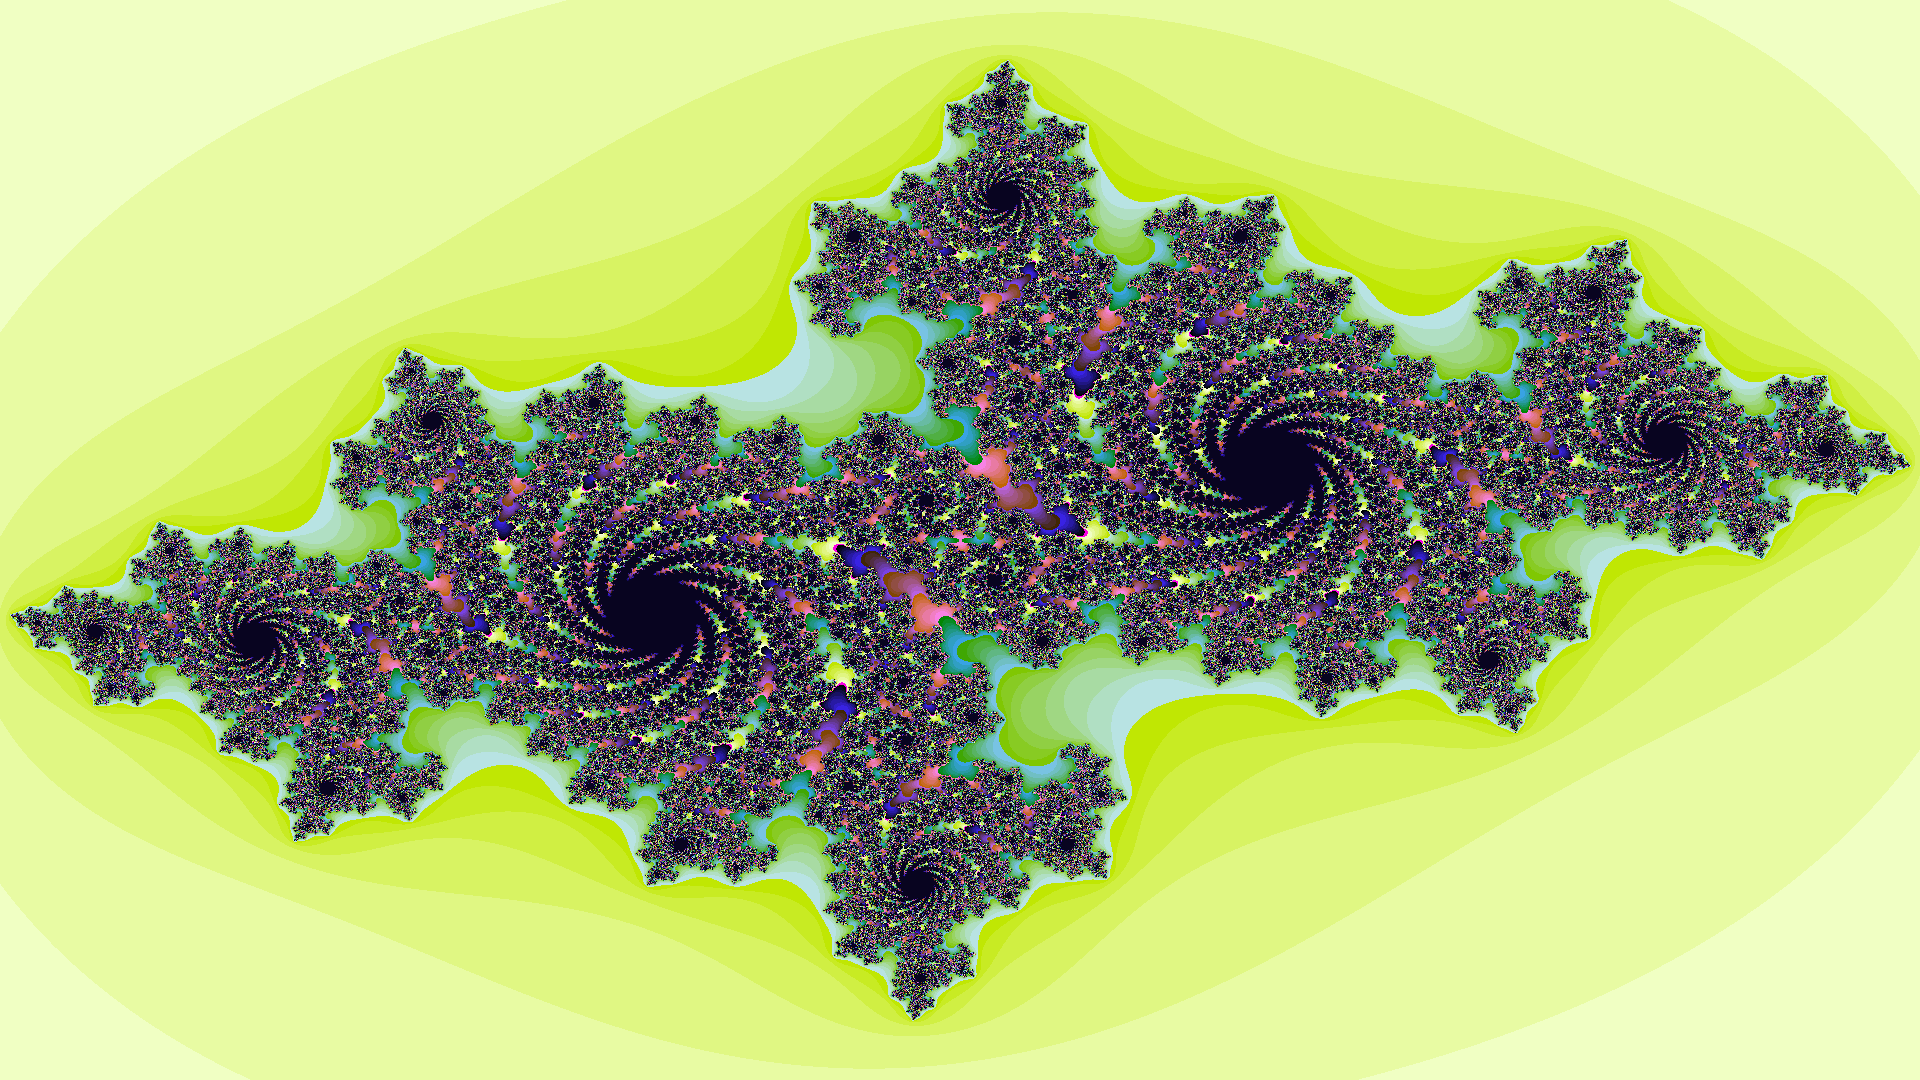

In [11]:
# Drawing Julia fractal
create_julia_fractal()

### Mandelbrot set

The Mandelbrot set is the set of complex numbers $c$ for which the function $ f_{c}(z)=z^{2}+c $ does not diverge when iterated from $ z=0 $, i.e., for which the sequence $ f_{c}(0), f_{c}(f_{c}(0)) $, etc., remains bounded in absolute value. <a href="#link_tree">[3]</a>

In [12]:
# Setting the width and height of the image to be created
WIDTH, HEIGHT = 1024, 512

In [13]:
# Function that return a tuple of colors as integer value of rgb 
def rgb_conv(i):
    color = 255 * array(colorsys.hsv_to_rgb(i / 255.0, 1.0, 0.5))
    return tuple(color.astype(int))

# Function defining a mandelbrot 
def mandelbrot(x, y): 
    c0 = complex(x, y)
    c = 0
    
    for i in range(1, 1000):
        if abs(c) > 2:
            return rgb_conv(i)
        c = c * c + c0
    
    return (0, 0, 0)

# Creating mandelbrot fractal image
def create_mandelbrot_fractal():
    
    # Creating the new image in RGB mode
    fractal = Image.new('RGB', (WIDTH, HEIGHT)) 
    pixels = fractal.load()
    
    for x in range(WIDTH):
        for y in range(HEIGHT):
            pixels[x, y] = mandelbrot((x - (0.75 * WIDTH)) / (WIDTH / 4), (y - (WIDTH / 4)) / (WIDTH / 4))
    
    return fractal

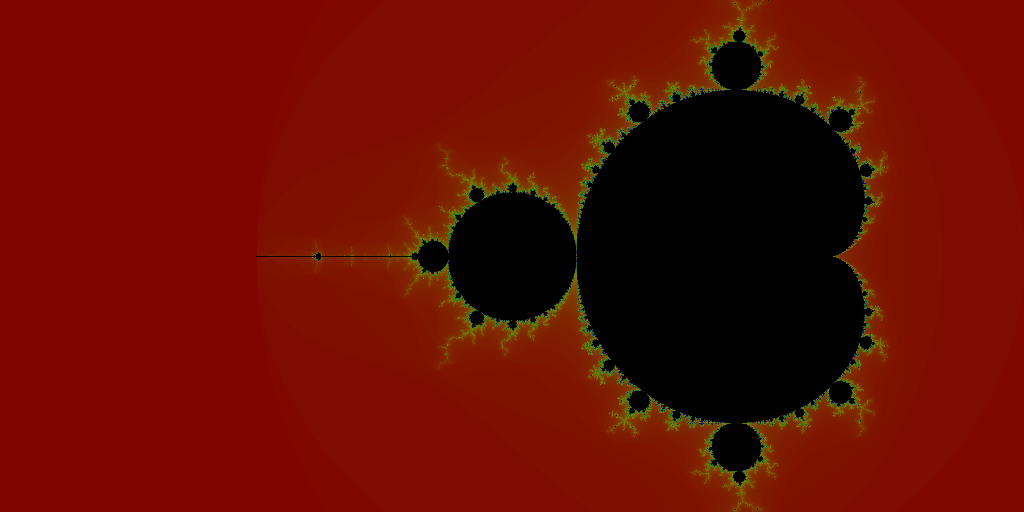

In [14]:
# Drawing Mandelbrot fractal
create_mandelbrot_fractal()

## Reference

<a name='link_one' href='https://en.wikipedia.org/wiki/Chaos_theory' target='_blank' >[1]</a> Wikipedia - Chaos Theory.  
<a name='link_two' href='https://en.wikipedia.org/wiki/Fractal' target='_blank' >[2]</a> Wikipedia - Fractal.  
<a name='link_tree' href='https://en.wikipedia.org/wiki/Mandelbrot_set' target='_blank' >[3]</a> Wikipedia - Mandelbrot set.  

<hr>
<p><a href="https://ansegura7.github.io/Algorithms/">« Home</a></p>